# Table of content
1. Objective of Project & Details about Data
2. Importing Libraries
3. Basic Data Exploration
4. Exploratory Data Analysis
5. Model Building

# Objective of Project& Details About Data

The objective of this article is to predict insurance costs based on people’s data, including age, Body Mass Index, smoking or not, etc. Additionally, we will determine what the most important variable influencing insurance costs is and create a Linear regression model to predict the insurance cost

### Details About Data :


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read Csv File

In [2]:
df = pd.read_csv(r'C:\Users\Sanklap\Desktop\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#
age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

# First Five Rows

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Last Five Rows

In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Check Null Values

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Check Information 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check Statistical VALUE

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Check Duplicate Value

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


# Drop Duplucate Value

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Summary Statistics of Categorical Columns

In [11]:
df.select_dtypes(include=['object']).describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


# Exploratory Data Analysis

### In this section we conduct analysis for finding out how features like age,bmi.smoking status affectsthe medical insurance cost

# 1.Medical Insurance Charges Vs Age

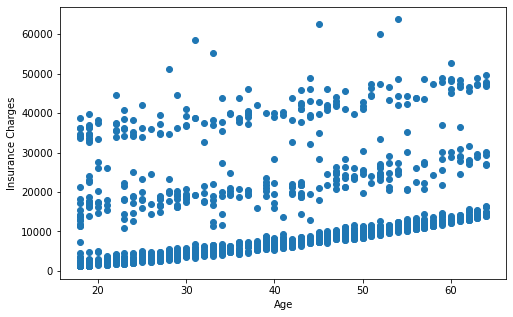

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(df.age,df.charges)
plt.xlabel("Age")
plt.ylabel("Insurance Charges")
plt.show()

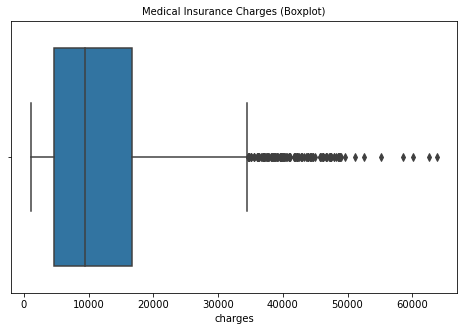

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(df['charges'])
plt.title('Medical Insurance Charges (Boxplot)', fontsize=10)
plt.show()

# 2.Medical Insurance Charges Vs BMI

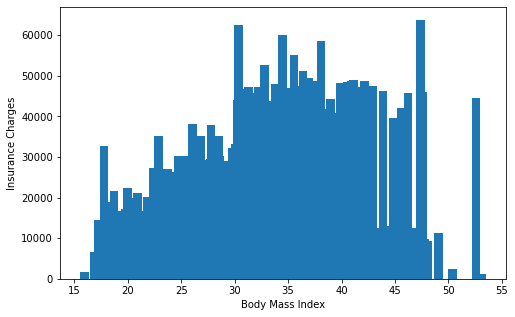

In [14]:
plt.figure(figsize=(8,5))
plt.bar(df.bmi,df.charges)
plt.xlabel("Body Mass Index")
plt.ylabel("Insurance Charges")
plt.show()

## Insights :
Medical Insurance Cost Increases with BMI value

## BMI Distribution:

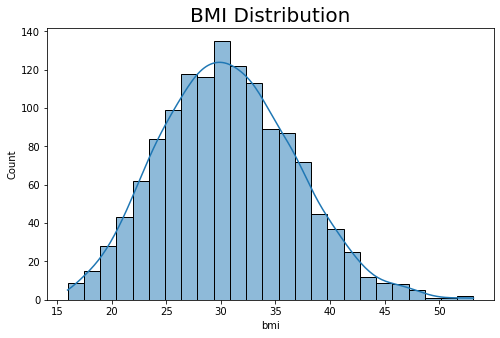

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution', fontsize=20)
plt.show()

# 3.Medical Insurance Charges Vs Number of Childrens

Text(0, 0.5, 'Insurance Charges')

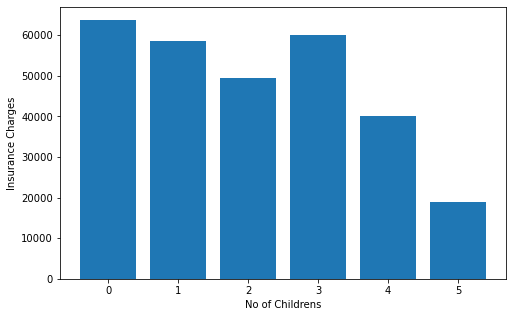

In [16]:
plt.figure(figsize=(8,5))
plt.bar(df.children,df.charges)
plt.xlabel("No of Childrens")
plt.ylabel("Insurance Charges")

# 4.Medical Insurance Charges Vs Smoking Status

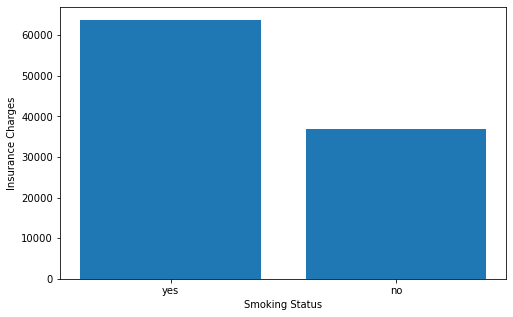

In [17]:
plt.figure(figsize=(8,5))
plt.bar(df.smoker,df.charges)
plt.xlabel("Smoking Status")
plt.ylabel("Insurance Charges")
plt.show()

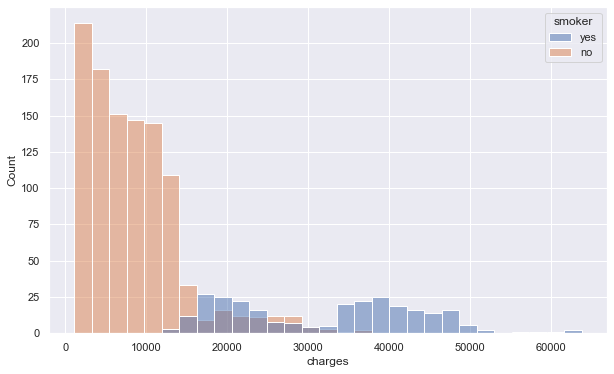

In [18]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="charges",hue="smoker")
plt.show()

## Insights :
Increased Medical Insurance Cost for individuals with smoking habit

# 5.Medical Insurance Charges Vs Gender

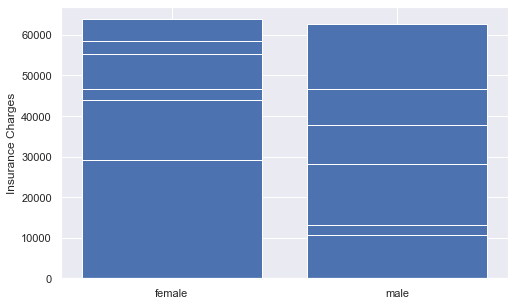

In [19]:
plt.figure(figsize=(8,5))
plt.bar(df.sex,df.charges)
plt.ylabel("Insurance Charges")
plt.show()

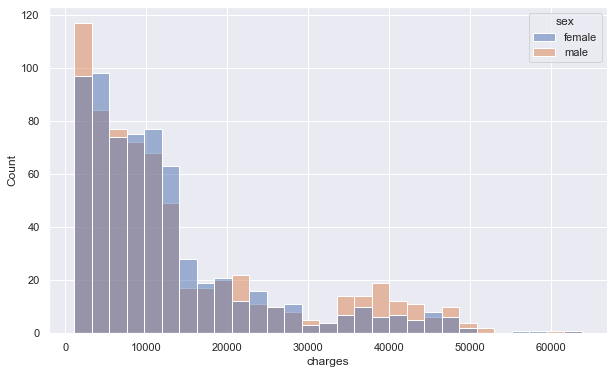

In [20]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="charges",hue="sex")
plt.show()

# 6.Medical Insurance Charges Vs Region

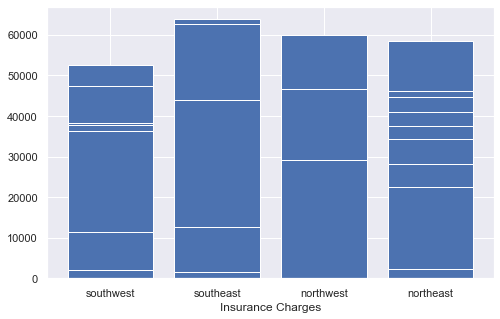

In [21]:
plt.figure(figsize=(8,5))
plt.bar(df.region,df.charges)
plt.xlabel("Insurance Charges")
plt.show()

#                               Prediction Model Building

### In this Section using the data, We are creating a Machine Learning Model using Loigistic Regression.

In [22]:
from sklearn.preprocessing import LabelEncoder  #encoding (we convert categorical variables into Numeric)
lb=LabelEncoder() 

df['sex']=lb.fit_transform(df['sex'])
df['smoker']=lb.fit_transform(df['smoker'])
df['region']=lb.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [23]:
X=df.drop('charges',axis=1)
y=df.charges
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

## Split the datasets into train and test subsets.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [27]:
model=LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
model.score(X_test,y_test)*100

75.42519989537485

In [30]:
print("Score of Linear Regression Model after Cross Validation:",cross_val_score(model,X,y,cv=5))

Score of Linear Regression Model after Cross Validation: [0.76123487 0.70840689 0.77720769 0.73365562 0.7551376 ]


In [31]:
pred=model.predict([[32,1,28.880,0,1,1]])
print('The insurance cost is USD ', pred[0])

The insurance cost is USD  29411.444888037156


## THE CONCLUSION :
we arrive at the end of this little project, we've seen some EDA and we've trained some models (linear regression model and cross val score) for predicting insurance cost 
